# Project 1: Telecommunication Customer Churn

- Vrutika Prajapati
- CS675 Introduction to Data Science
- UID: U01994496

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sweetviz as sv
import webbrowser
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
import xgboost as xgb

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve
import warnings
warnings.filterwarnings('ignore')


# Understanding the data

In [6]:

df = pd.read_csv('telco-customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
print(df.to_string)

<bound method DataFrame.to_string of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service            

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.size

147903

In [10]:
df.shape

(7043, 21)

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Checking null values

In [13]:
#checking null values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [14]:
df.duplicated().sum()

0

## Detecting outliers

In [16]:
# Describe the dataframe
print(df.describe())

# Calculate IQR for 'MonthlyCharges' (example)
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Find rows with outliers
outliers = df[(df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)]
print("Outliers:\n",outliers)


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
Lower bound for outliers: -46.02499999999999
Upper bound for outliers: 171.375
Outliers:
 Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


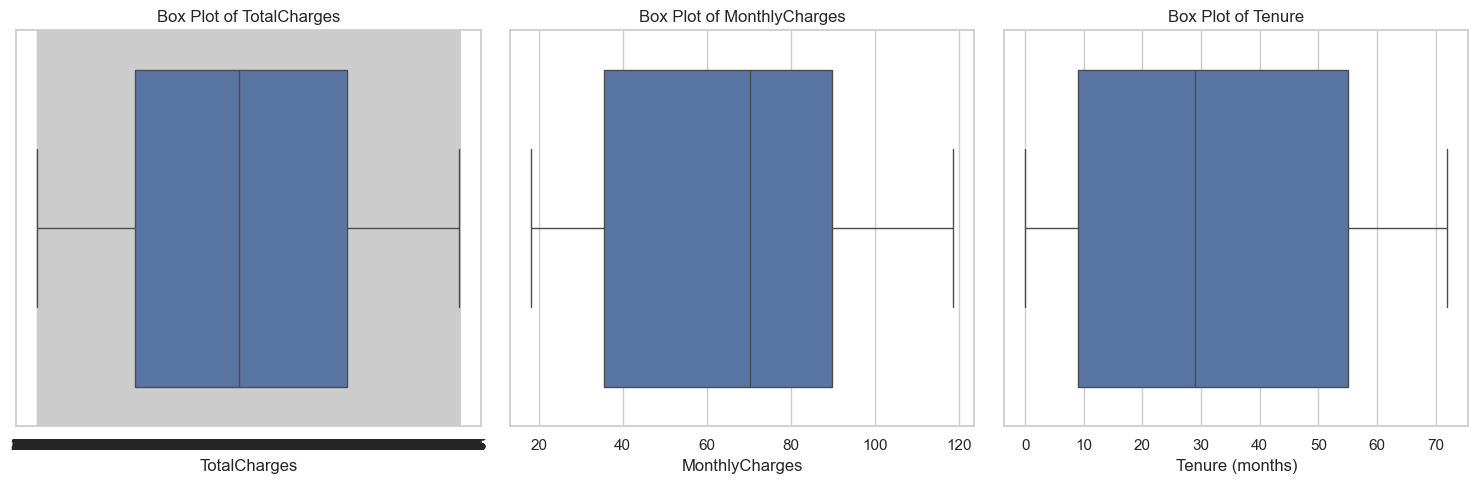

In [17]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Boxplot for TotalCharges
plt.subplot(1, 3, 1)
sns.boxplot(x=df['TotalCharges'])
plt.title('Box Plot of TotalCharges')
plt.xlabel('TotalCharges')

# Boxplot for MonthlyCharges
plt.subplot(1, 3, 2)
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Box Plot of MonthlyCharges')
plt.xlabel('MonthlyCharges')

# Boxplot for Tenure
plt.subplot(1, 3, 3)
sns.boxplot(x=df['tenure'])
plt.title('Box Plot of Tenure')
plt.xlabel('Tenure (months)')

# Adjust the layout
plt.tight_layout()
plt.show()



In [18]:

# Display the unique values in TotalCharges to check for non-numeric values
print("Unique TotalCharges values before conversion:\n", df['TotalCharges'].unique())

# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())
# Handle NaN values if needed, for example by filling them with 0 or another strategy
df['TotalCharges'].fillna(0.0, inplace=True)

# Convert TotalCharges to float type
df['TotalCharges'] = df['TotalCharges'].astype(float)


Unique TotalCharges values before conversion:
 ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
11


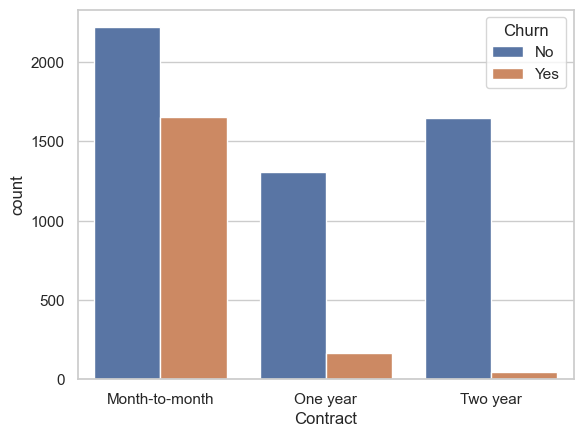

In [19]:
# Count plot of a contract
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()


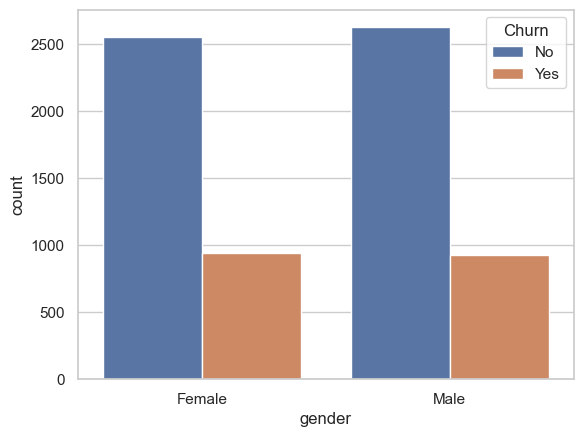

In [20]:
# Count plot of a gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()


In [21]:
payment_count = df['PaymentMethod'].value_counts()
payment_count

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

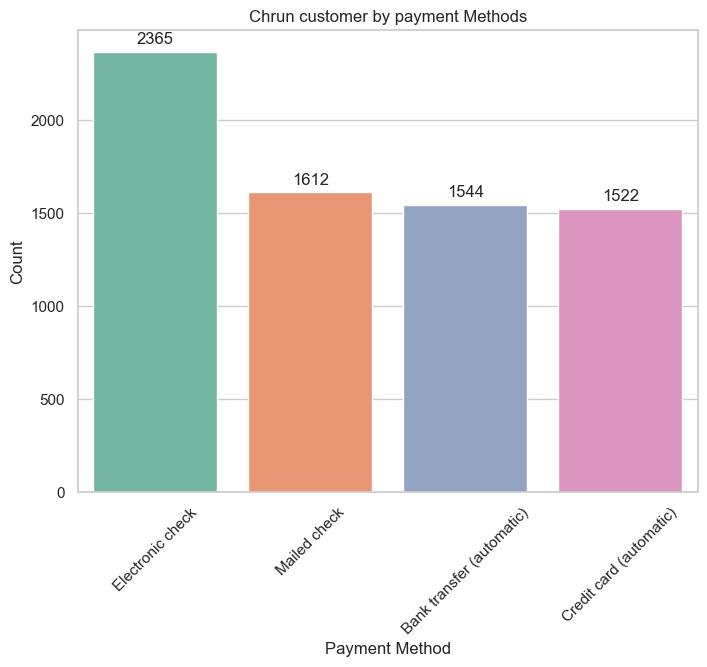

In [22]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=payment_count.index,y=payment_count.values,palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Chrun customer by payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
InternetService_count =  df['InternetService'].value_counts()
InternetService_count

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

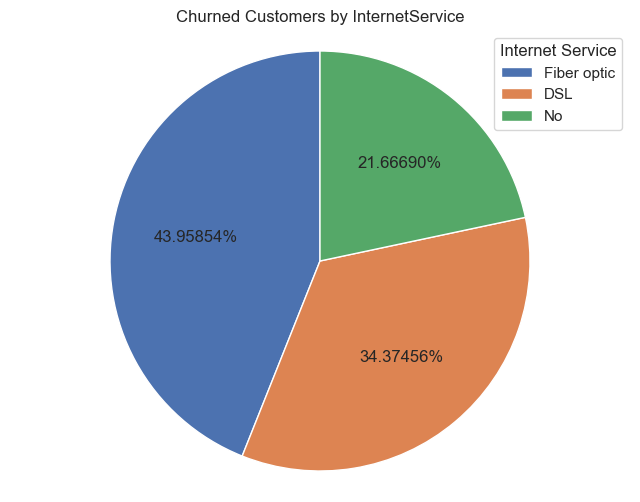

In [24]:
plt.figure(figsize=(8, 6))
plt.pie(InternetService_count, autopct='%1.5f%%', startangle=90)
plt.legend(InternetService_count.index, title="Internet Service", loc="best")
plt.title('Churned Customers by InternetService')
plt.axis('equal')
plt.show()

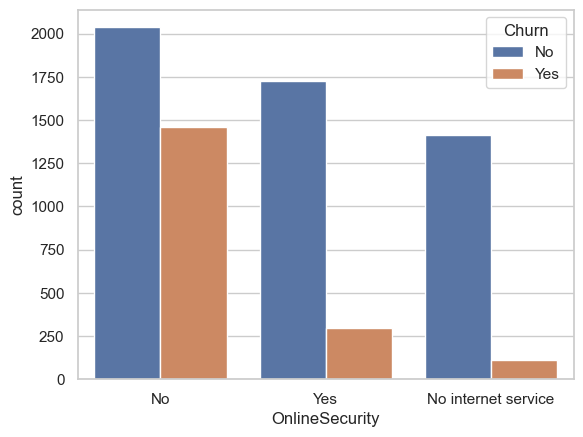

In [25]:
# Count plot of a online security
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.show()

In [26]:
churned_customers = df[df['Churn'] == "Yes"]

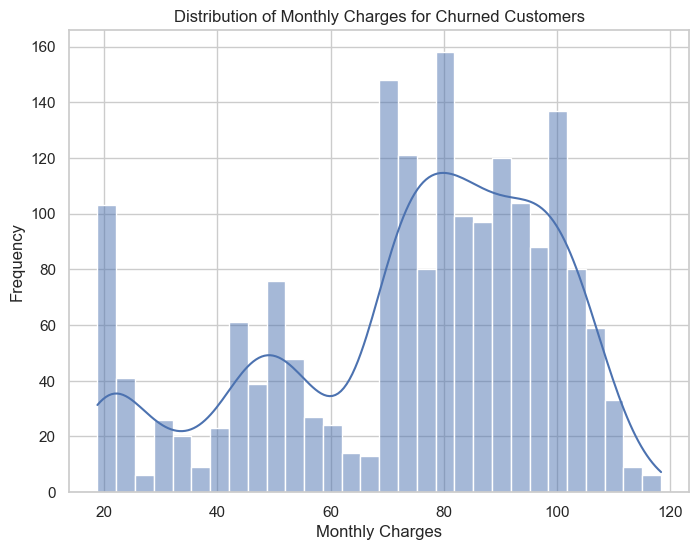

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(churned_customers['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

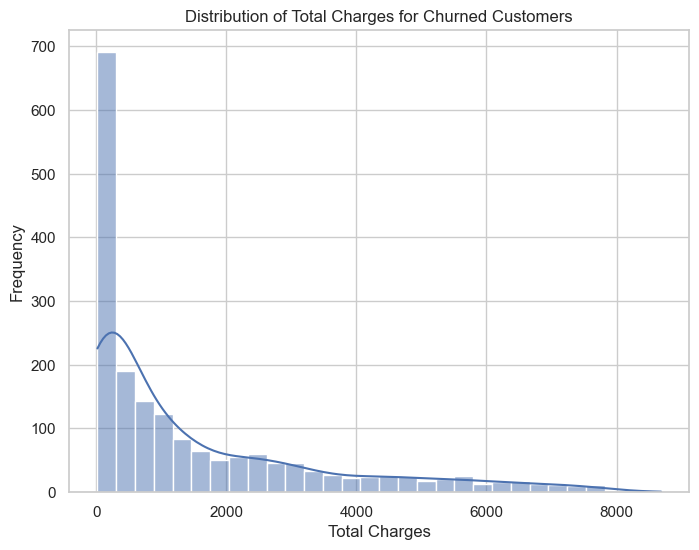

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(churned_customers['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of Total Charges for Churned Customers')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

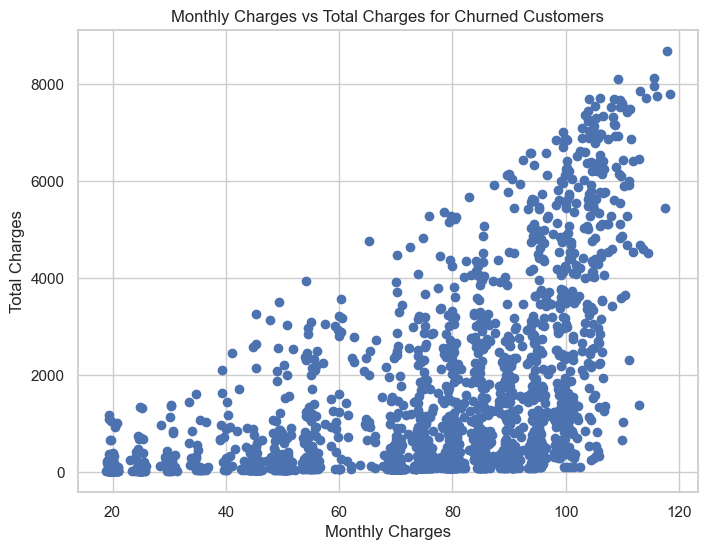

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(churned_customers['MonthlyCharges'], churned_customers['TotalCharges'])
plt.title('Monthly Charges vs Total Charges for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

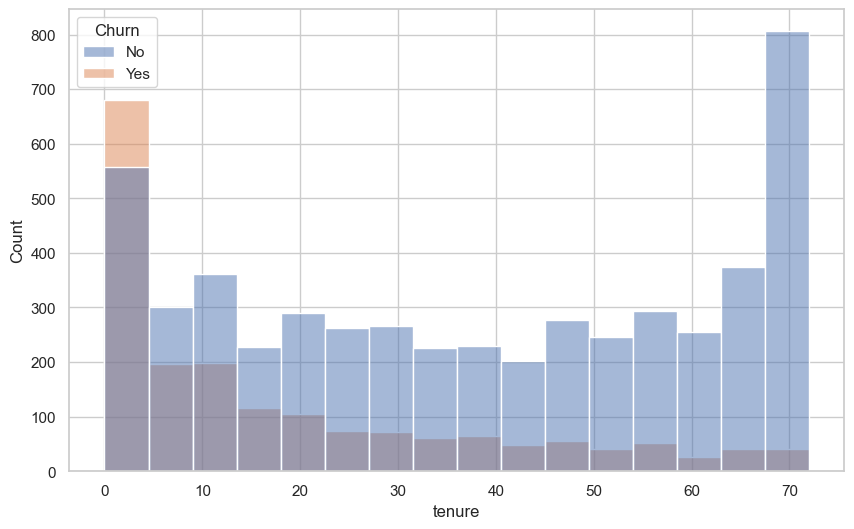

In [30]:
plt.figure(figsize = (10,6))
sns.histplot(x = 'tenure', data = df, hue= 'Churn')
plt.show()

In [31]:
customer_data = df['customerID']


# Drop the 'customerID' and 'TotalCharges' columns from the main dataset
df = df.drop(['customerID'], axis=1)

# Display the new DataFrame and the modified original DataFrame
print("Customer Data:\n", customer_data.head())

Customer Data:
 0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object


# Listing numeric and categorical features

In [33]:
# Separate categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object']).columns
numerical_vars=df.select_dtypes(include=['float64', 'int64']).columns

print("Categorical columns (excluding CustomerID):\n", categorical_vars)
print("\nNumerical columns:\n", numerical_vars)

Categorical columns (excluding CustomerID):
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Numerical columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [34]:
# Separate the categorical variables
df_categorical = df[categorical_vars]

# Apply one-hot encoding to categorical variables
df_categorical_encoded = pd.get_dummies(df_categorical, drop_first=True)

# Convert boolean True/False to 1/0 if there are any remaining booleans in the dataset
df_categorical_encoded = df_categorical_encoded.astype(int)

# Display the encoded categorical variables
df_categorical_encoded.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [35]:
# Concatenate the encoded categorical variables with the numerical variables
df_encoded = pd.concat([df[numerical_vars],df_categorical_encoded], axis=1)

In [36]:
df_encoded.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [37]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,-0.001874,0.016479,-0.211185,0.008576,-0.008576,0.142948,...,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477,0.150889
tenure,0.016567,1.000000,0.247900,0.826178,0.005106,0.379697,0.159712,0.008448,-0.008448,0.331941,...,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,-0.014569,0.096848,-0.113890,0.247398,-0.247398,0.490434,...,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437,0.193356
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.000080,0.317504,0.062078,0.113214,-0.113214,0.468504,...,0.514973,-0.375223,0.520122,0.170814,0.354481,0.158574,0.182915,-0.059246,-0.295758,-0.198324
gender_Male,-0.001874,0.005106,-0.014569,-0.000080,1.000000,-0.001808,0.010517,-0.006488,0.006488,-0.008414,...,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744,-0.008612
Partner_Yes,0.016479,0.379697,0.096848,0.317504,-0.001808,1.000000,0.452676,0.017706,-0.017706,0.142057,...,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125,-0.150448
Dependents_Yes,-0.211185,0.159712,-0.113890,0.062078,0.010517,0.452676,1.000000,-0.001762,0.001762,-0.024526,...,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071,-0.164221
PhoneService_Yes,0.008576,0.008448,0.247398,0.113214,-0.006488,0.017706,-0.001762,1.000000,-1.000000,0.279690,...,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319,0.011942
MultipleLines_No phone service,-0.008576,-0.008448,-0.247398,-0.113214,0.006488,-0.017706,0.001762,-1.000000,1.000000,-0.279690,...,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319,-0.011942
MultipleLines_Yes,0.142948,0.331941,0.490434,0.468504,-0.008414,0.142057,-0.024526,0.279690,-0.279690,1.000000,...,0.257152,-0.210564,0.258751,-0.003794,0.106253,0.163530,0.060048,0.083618,-0.227206,0.040102


<Axes: >

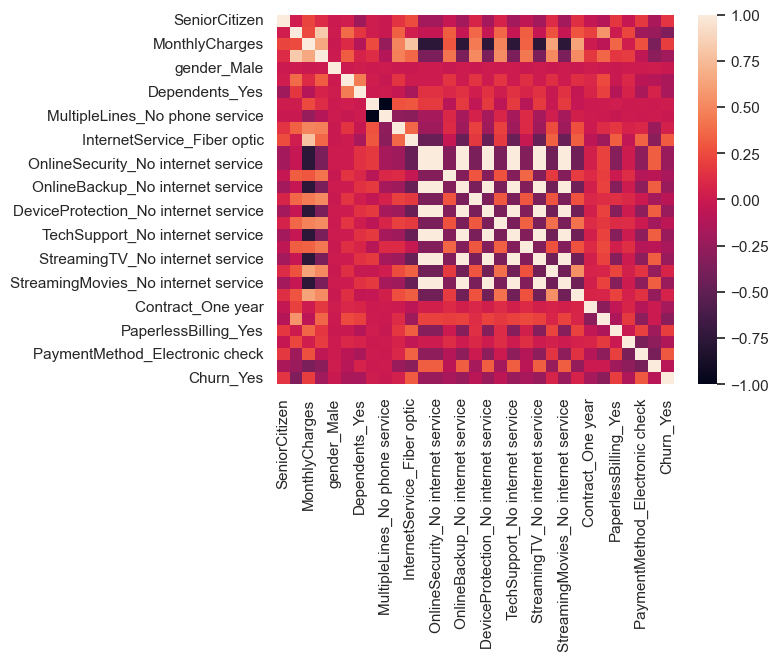

In [38]:
sns.heatmap(correlation_matrix)

In [39]:
# Assuming Churn_Yes corresponds to the numeric representation of 'Churn'
churn_yes_corr = correlation_matrix['Churn_Yes']  # If Churn is 1 for Yes, we can use it

# Print all features correlated with 'Churn_Yes'
print("Features correlated with 'Churn_Yes':")
print(churn_yes_corr)


Features correlated with 'Churn_Yes':
SeniorCitizen                            0.150889
tenure                                  -0.352229
MonthlyCharges                           0.193356
TotalCharges                            -0.198324
gender_Male                             -0.008612
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
PhoneService_Yes                         0.011942
MultipleLines_No phone service          -0.011942
MultipleLines_Yes                        0.040102
InternetService_Fiber optic              0.308020
InternetService_No                      -0.227890
OnlineSecurity_No internet service      -0.227890
OnlineSecurity_Yes                      -0.171226
OnlineBackup_No internet service        -0.227890
OnlineBackup_Yes                        -0.082255
DeviceProtection_No internet service    -0.227890
DeviceProtection_Yes                    -0.066160
TechSupport_No internet service         -0.227890
TechSupport_

In [40]:
# Filter important features based on the specified threshold
important_features = churn_yes_corr[(churn_yes_corr > 0.3) | (churn_yes_corr < -0.3)]

# Display important features
print("Important Features with correlation > 0.3 or < -0.3 with respect to 'Churn':")
print(important_features)

Important Features with correlation > 0.3 or < -0.3 with respect to 'Churn':
tenure                           -0.352229
InternetService_Fiber optic       0.308020
Contract_Two year                -0.302253
PaymentMethod_Electronic check    0.301919
Churn_Yes                         1.000000
Name: Churn_Yes, dtype: float64


In [41]:

# Split data into train (80%) and test (20%)
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)

# Compare train and test datasets using SweetViz

report = sv.compare([train_df, "Train"], [test_df, "Test"], target_feat='Churn_Yes')
report.show_html('sweetviz_comparison.html')
webbrowser.open('sweetviz_comparison.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


True

# **Fitting  models on the original (given) dataset**

In [43]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)

    # Print model performance
    print(f"{name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}\n")


Naive Bayes Performance:
  Accuracy: 0.6657
  Precision: 0.4359
  Recall: 0.8928
  F1 Score: 0.5858

Logistic Regression Performance:
  Accuracy: 0.8204
  Precision: 0.6852
  Recall: 0.5952
  F1 Score: 0.6370

Random Forest Performance:
  Accuracy: 0.7871
  Precision: 0.6409
  Recall: 0.4450
  F1 Score: 0.5253

XGBoost Performance:
  Accuracy: 0.7949
  Precision: 0.6373
  Recall: 0.5228
  F1 Score: 0.5744



# **Applying SMOTE technique**

In [47]:
global_mean = np.round(df_encoded['Churn_Yes'].mean(), 2)
global_mean

0.27

In [48]:
import plotly.graph_objs as go

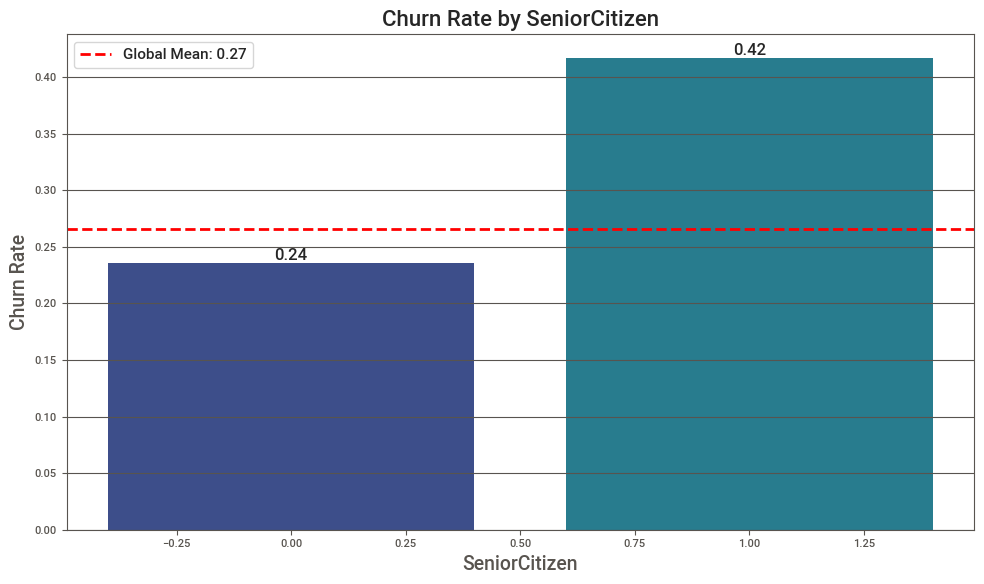

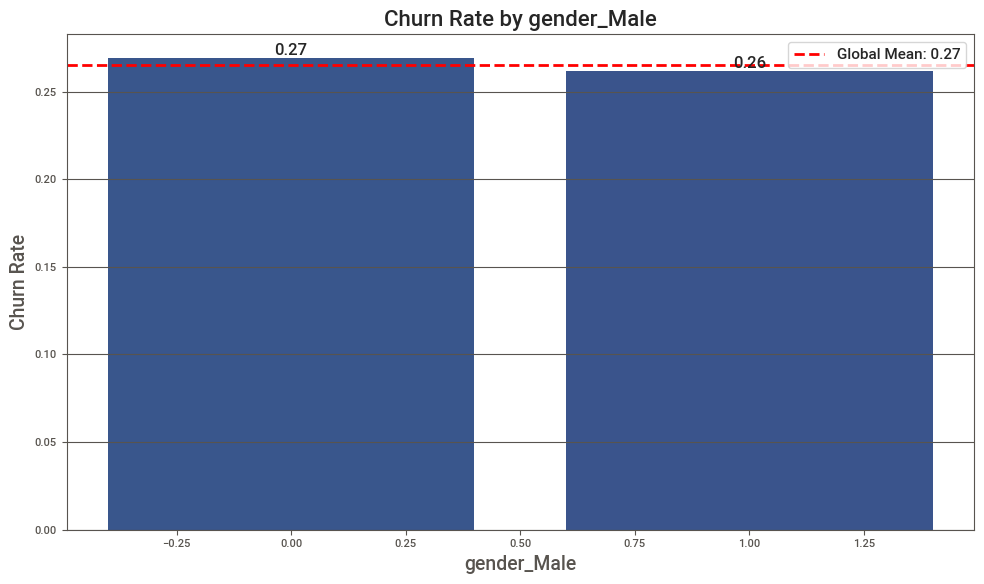

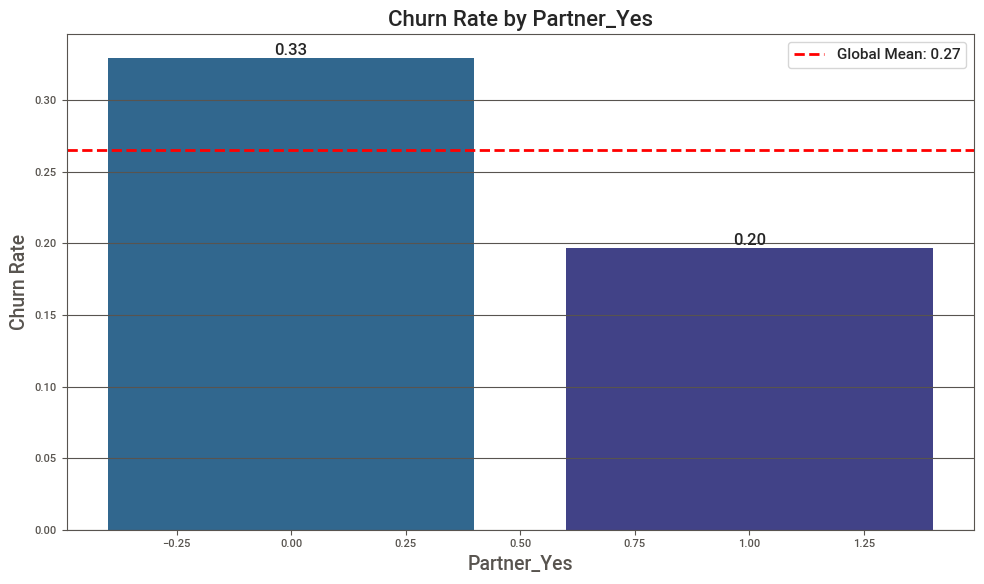

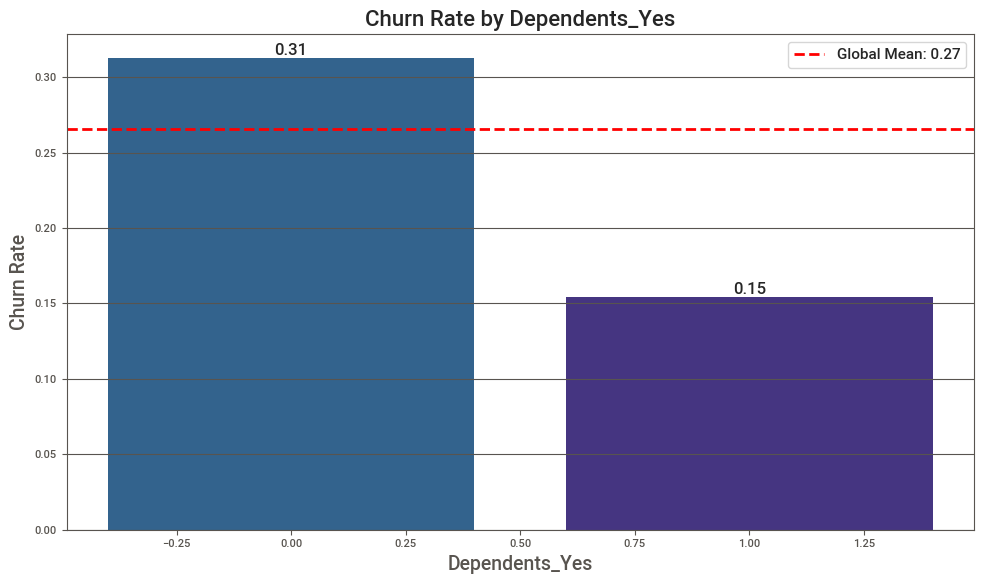

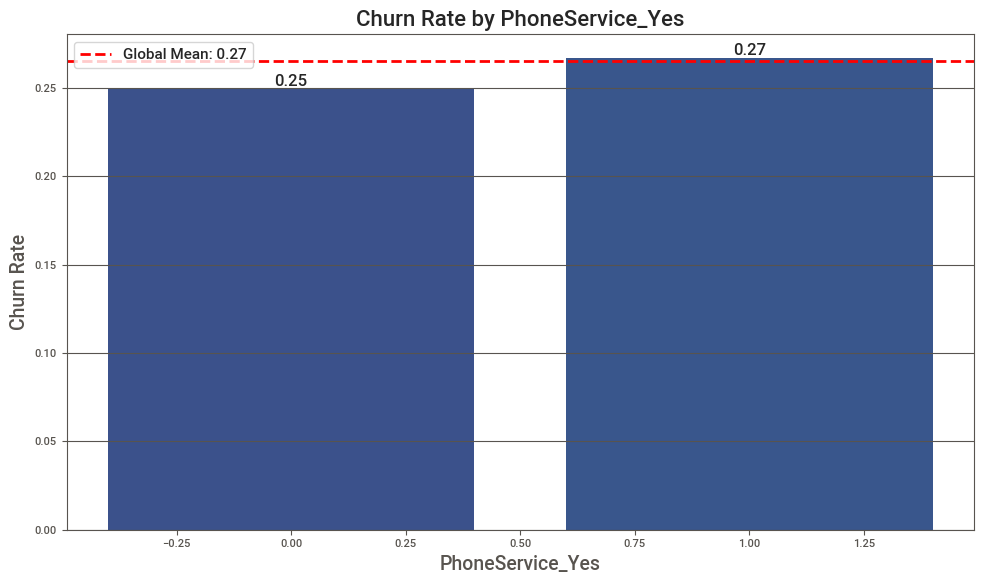

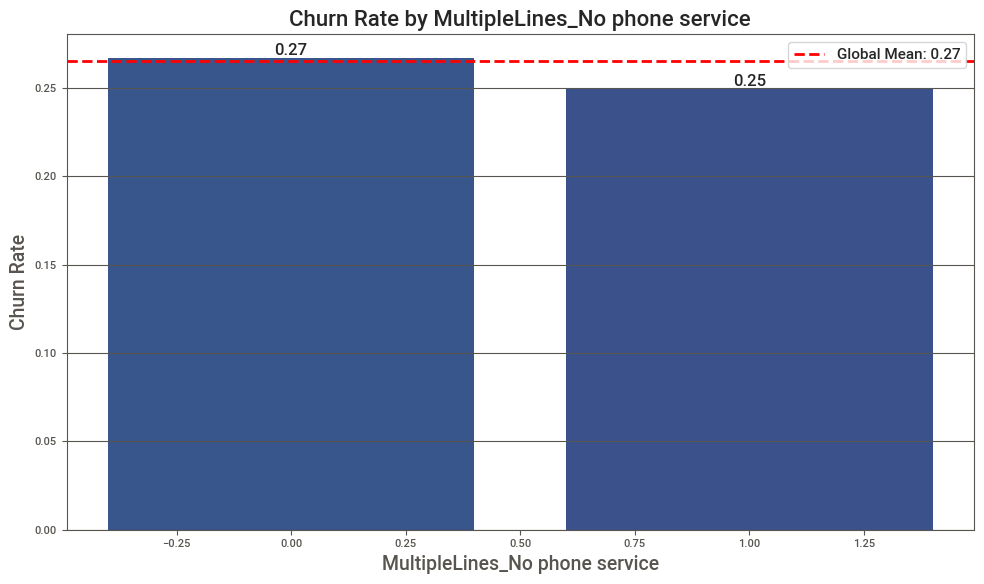

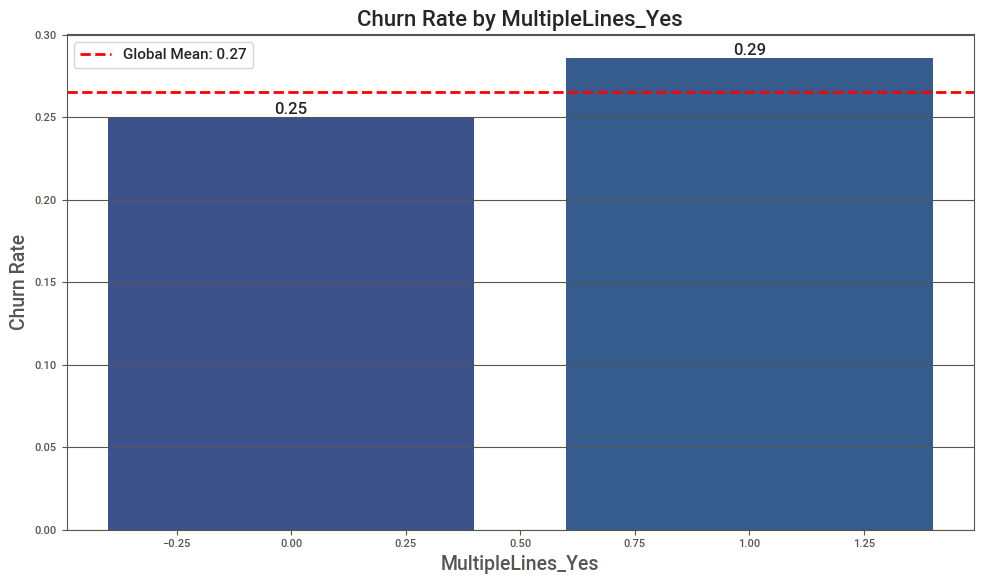

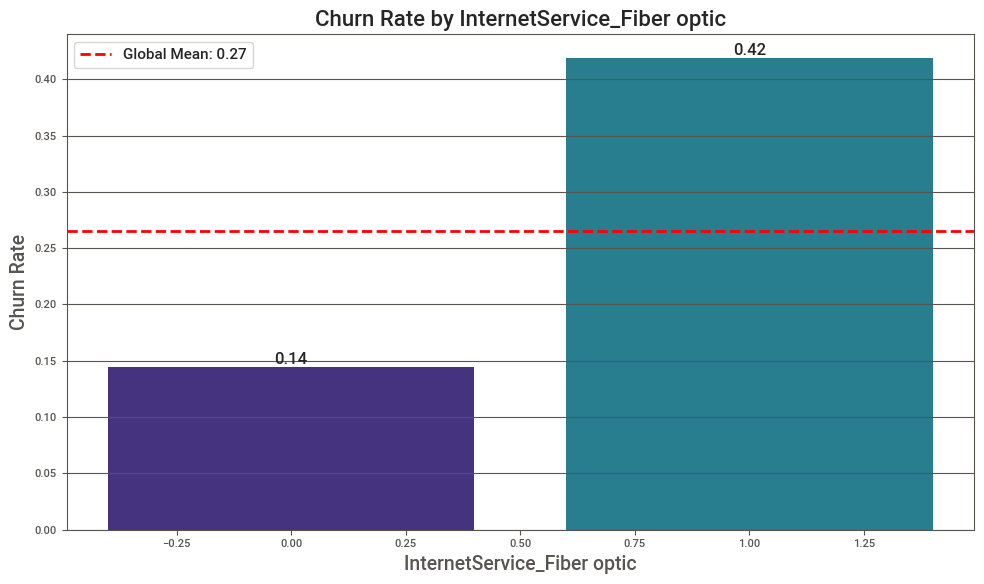

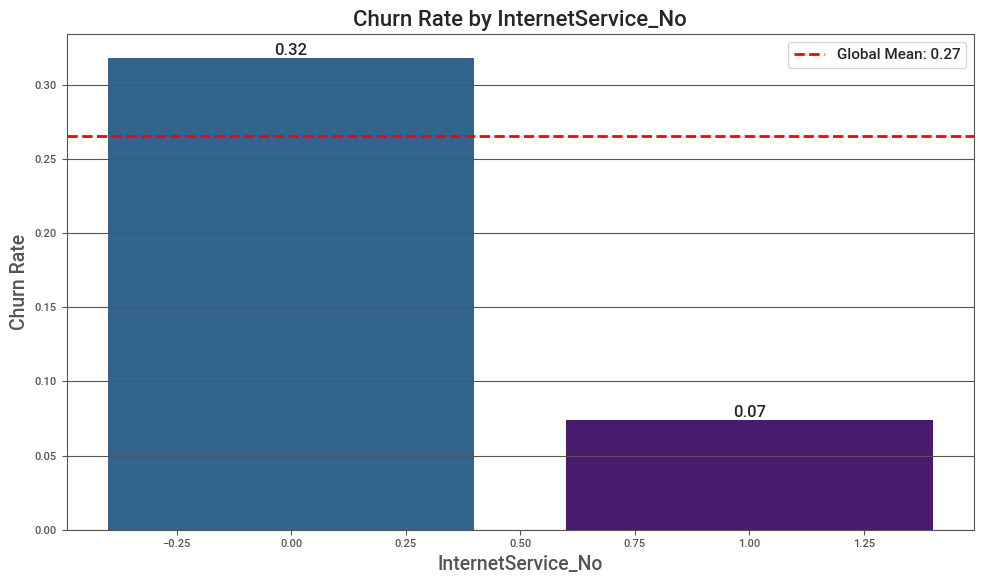

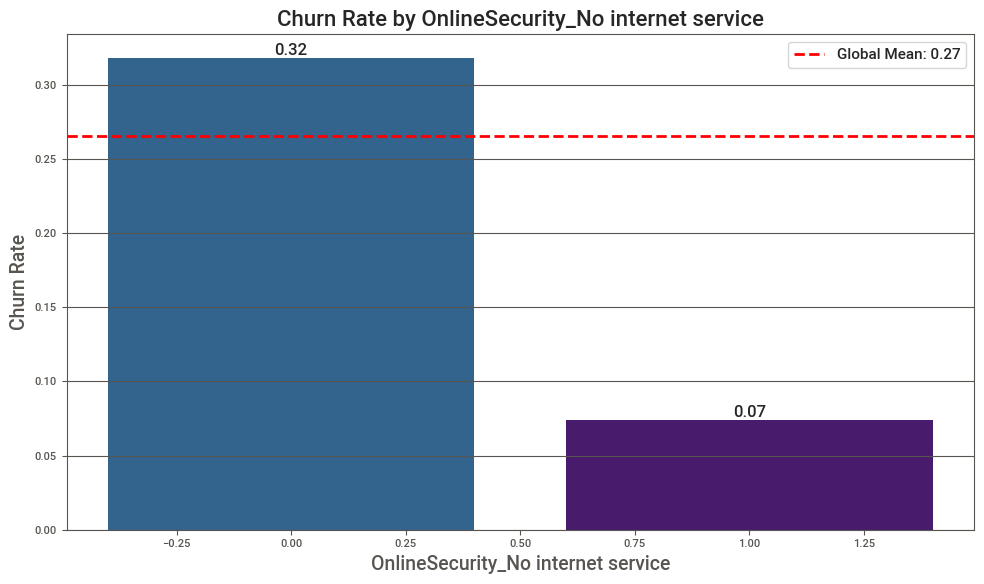

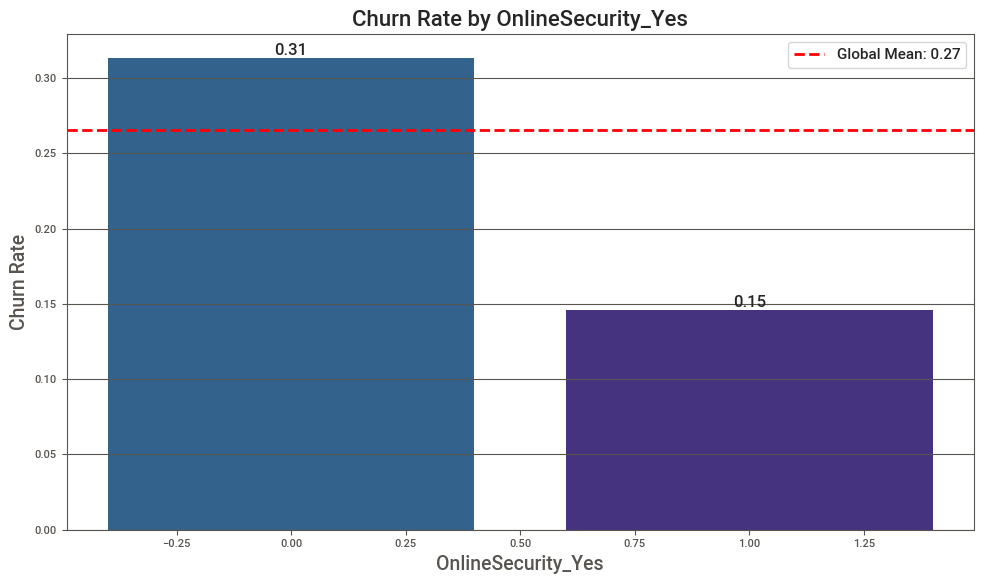

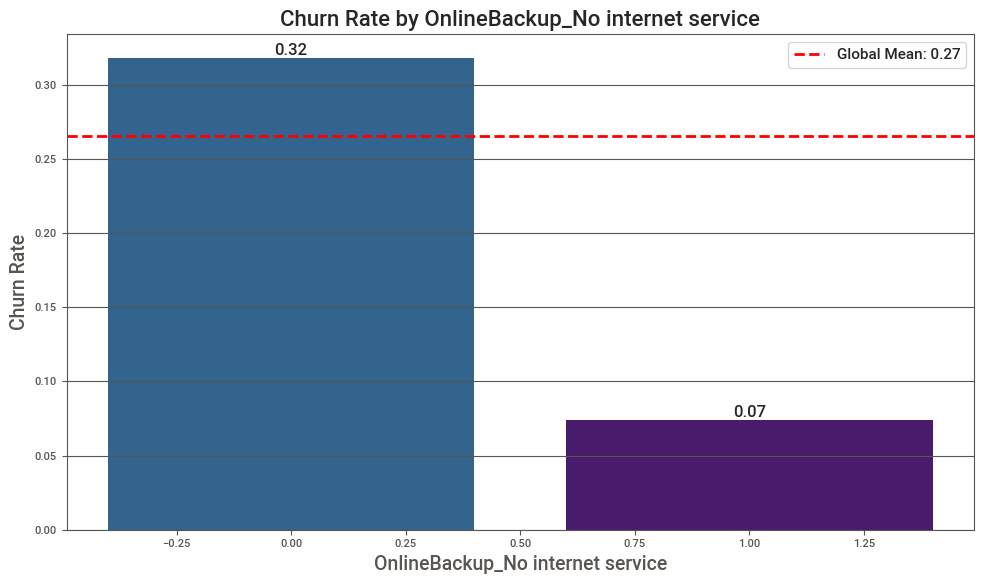

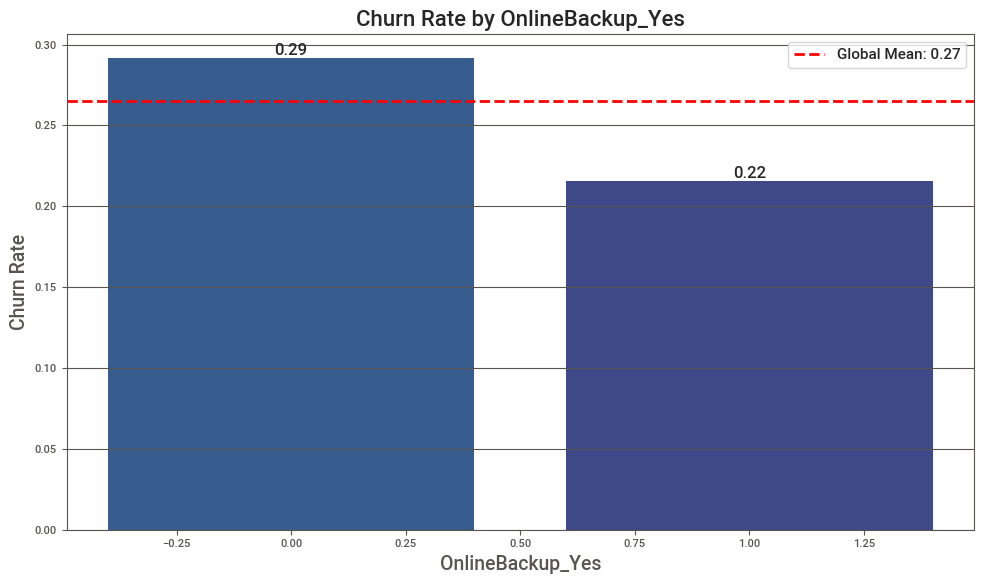

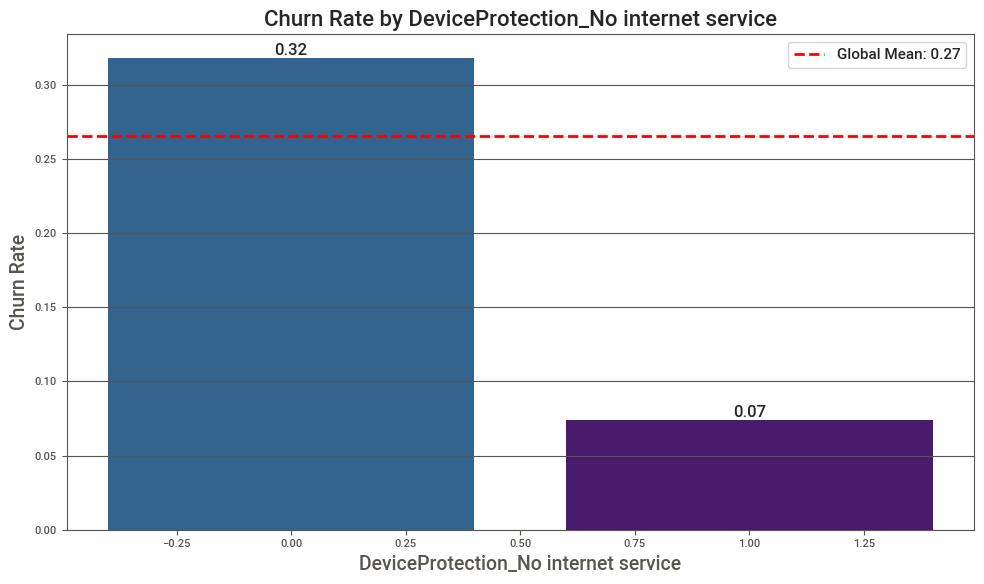

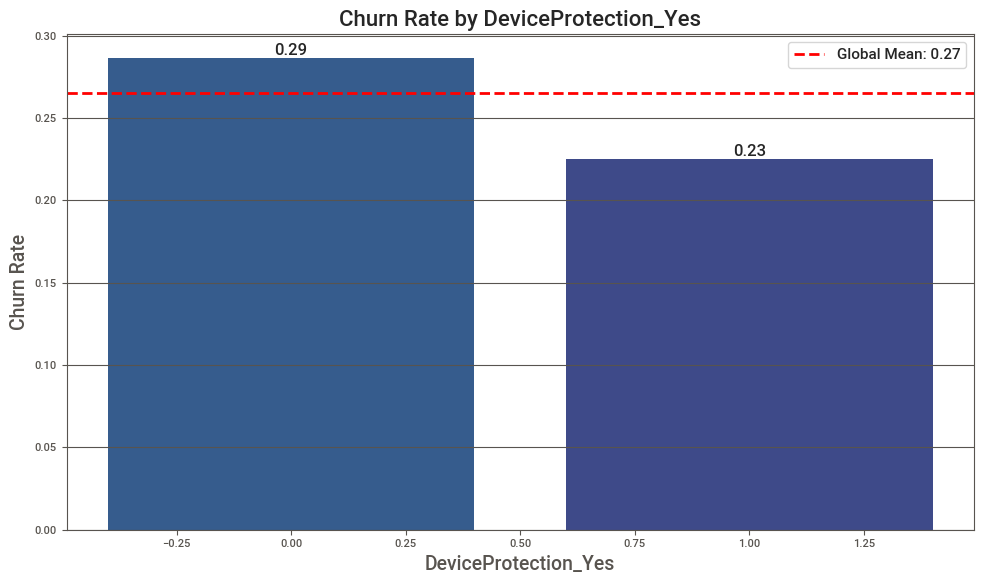

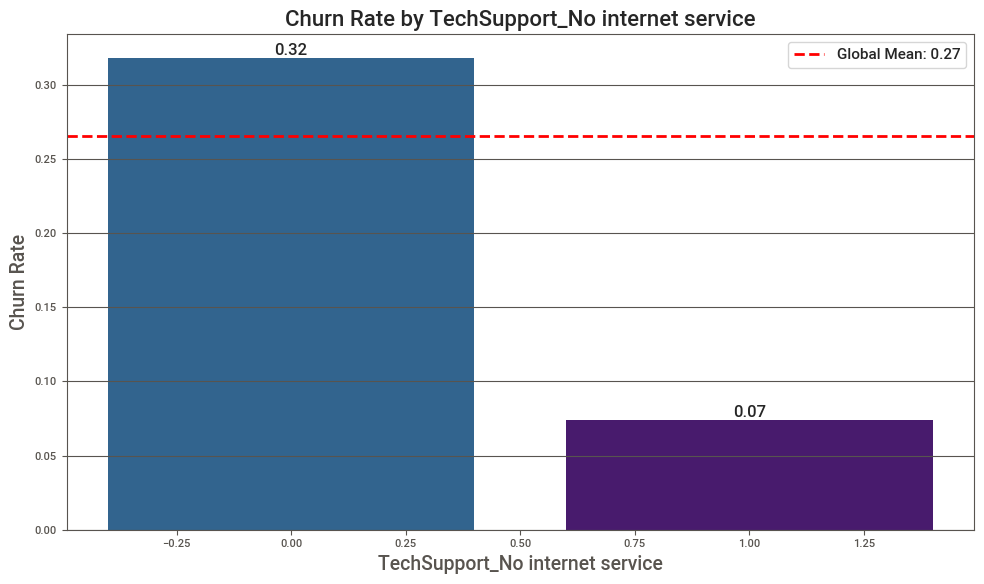

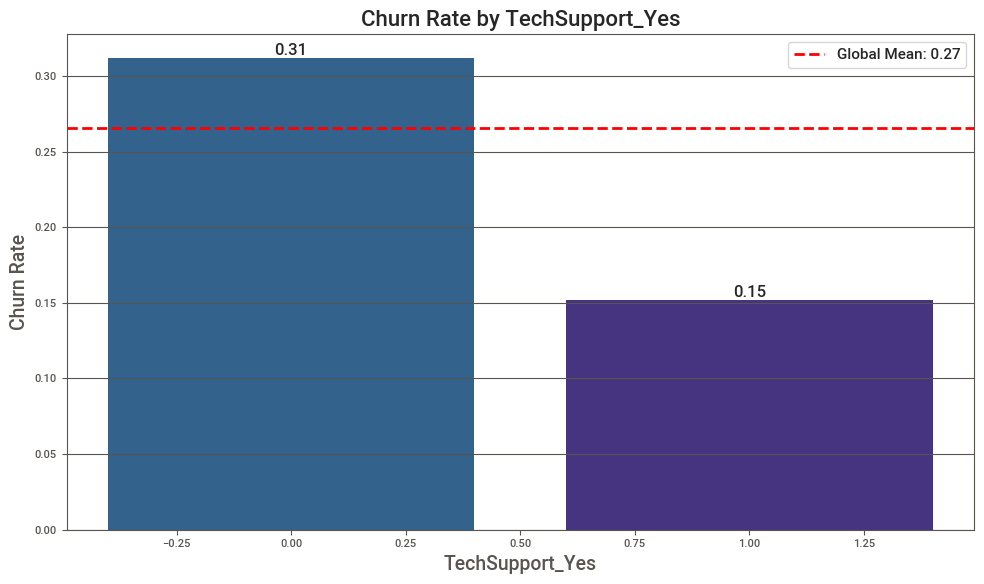

In [49]:
exclude_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

render_limit = 16  # Limit the number of figures to avoid crashes
counter = 0

# Assuming global_mean is defined somewhere in your code
global_mean = df_encoded['Churn_Yes'].mean()  # Example calculation of global mean

for feature in df_encoded.columns:
    if feature in exclude_columns or feature == 'Churn_Yes':
        continue

    # Calculate the mean churn rate for each feature value
    df_group = df_encoded.groupby(by=feature)['Churn_Yes'].mean().reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_group[feature], df_group['Churn_Yes'], color=plt.cm.viridis(df_group['Churn_Yes']))

    # Add global mean line
    plt.axhline(y=global_mean, color='red', linestyle='--', linewidth=2, label=f'Global Mean: {global_mean:.2f}')

    # Add text labels on bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

    # Set titles and labels
    plt.title(f'Churn Rate by {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Churn Rate', fontsize=14)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()

    if counter < render_limit:
        plt.show()
        counter += 1
    else:
        break


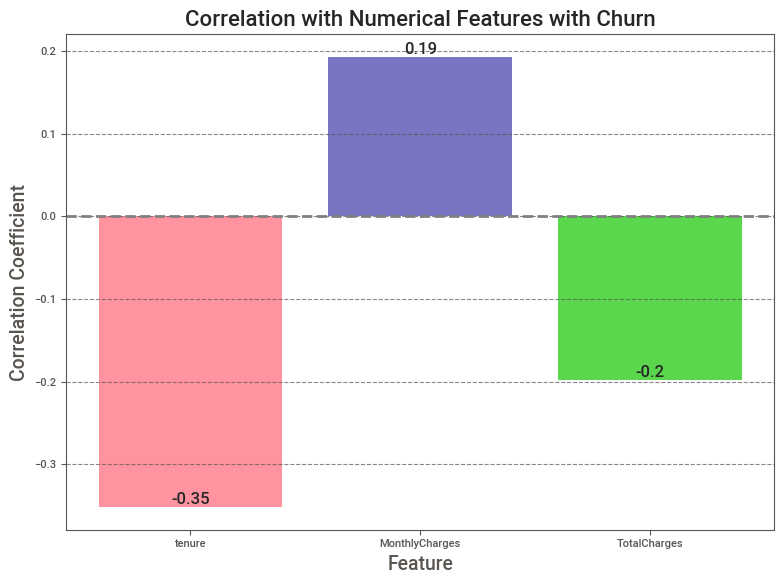

In [50]:
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

correlations = {}
for col in num_columns:
    correlation = df[col].corr(df_encoded['Churn_Yes'])
    correlations[col] = correlation

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(correlation_df['Feature'], correlation_df['Correlation'],
                color=['#FF7889', '#5652B4', '#32CD22'],
                alpha=0.8)

# Add correlation values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
             ha='center', va='bottom')

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linestyle='--', linewidth=2)

# Customize the plot
plt.title('Correlation with Numerical Features with Churn', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to avoid clipping of labels

# Show the plot
plt.show()


In [51]:
df_encoded.drop(['gender_Male'], axis=1, inplace=True) # Gender form Visiualizations and corr => Not effect in the decision coulmn

In [52]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [53]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_smote, y_smote)

df_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Churn_Yes'])], axis=1)

In [54]:
df_smote.shape

(9877, 31)

In [55]:
df_smote.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

# **Spliting Training and Testing Dataset**

In [57]:
X = df_smote.drop(['Churn_Yes'], axis=1)
y = df_smote['Churn_Yes']


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:

X = scaler.fit_transform(X)

# **Random Forest**

In [62]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Change to 'macro' if multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.8618
Precision: 0.8478
Recall: 0.8649
F1-Score: 0.8562


Hyperparameter tuning

In [64]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

forest_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_forest = best_model.predict(X_test)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [65]:

print(best_params)
print(best_model)
print(accuracy_score(y_test, y_pred_forest))

{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(bootstrap=False, min_samples_leaf=2)
0.8577935222672065


In [66]:
forest_model = RandomForestClassifier(class_weight='balanced', bootstrap= False, max_depth= 26, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 250)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
y_prob_forest = forest_model.predict_proba(X_test)[:, 1]

fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

print("Random Forest MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_forest))

Random Forest MODEL
Accuracy: 0.8628542510121457
ROC-AUC: 0.9357538199293518


classification report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1036
           1       0.85      0.86      0.86       940

    accuracy                           0.86      1976
   macro avg       0.86      0.86      0.86      1976
weighted avg       0.86      0.86      0.86      1976



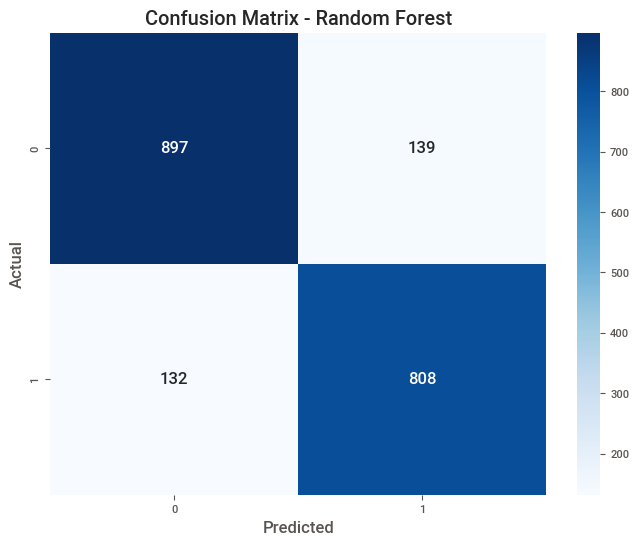

In [67]:
print("classification report")
print(classification_report(y_test, y_pred_forest))
cm = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# **Cross Validation**

In [69]:
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(forest_model, X_train, y_train, cv=skf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.8513599  0.84240506 0.85696203 0.85       0.85443038]
Mean CV Accuracy: 0.8510314734305318


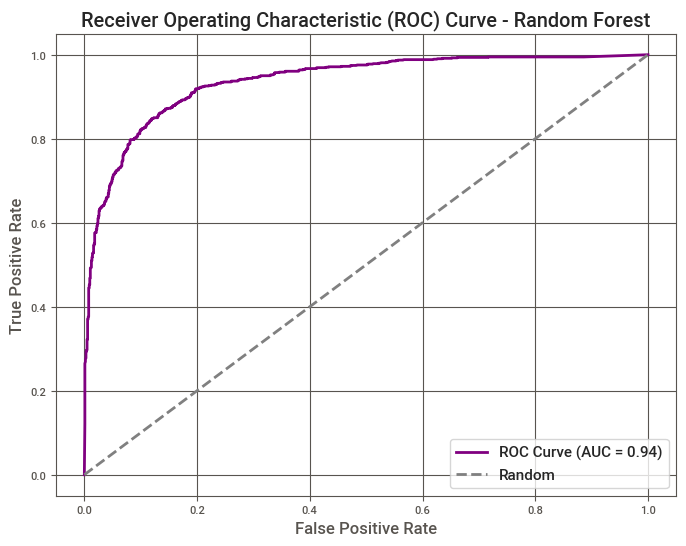

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve points and AUC score
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc_forest:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')

# Customizing the plot
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)

# Show plot
plt.show()


# **XGBoost**

In [72]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)
print("XGBOOST MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
XGBOOST MODEL
Accuracy: 0.854757085020243
ROC-AUC: 0.9399244229031464


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1036
           1       0.84      0.86      0.85       940

    accuracy                           0.85      1976
   macro avg       0.85      0.86      0.85      1976
weighted avg       0.86      0.85      0.85      1976



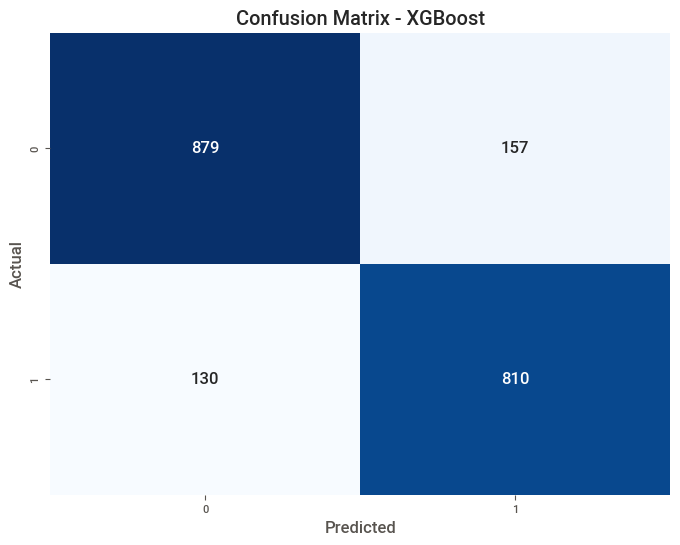

In [73]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBoost')
plt.show()

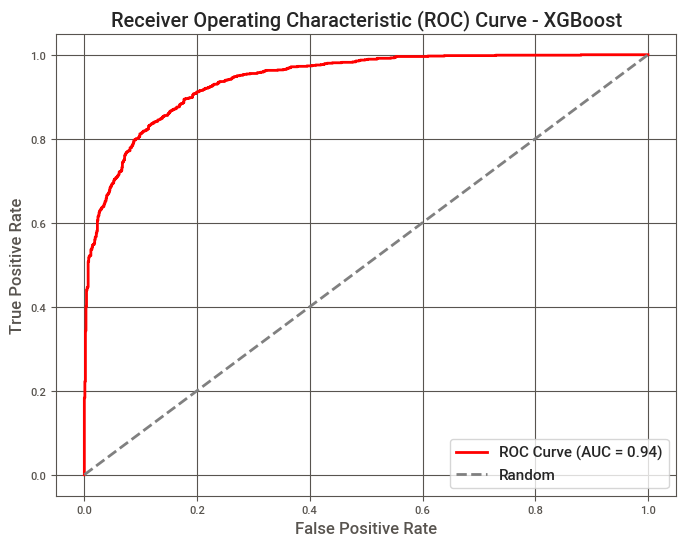

In [74]:
# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **Logistic Regression**

In [76]:
log_model = LogisticRegression(solver="liblinear" , random_state=1)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

print("Logistic Regression MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

Logistic Regression MODEL
Accuracy: 0.8360323886639676
ROC-AUC: 0.9281873819107862


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1036
           1       0.81      0.85      0.83       940

    accuracy                           0.84      1976
   macro avg       0.84      0.84      0.84      1976
weighted avg       0.84      0.84      0.84      1976



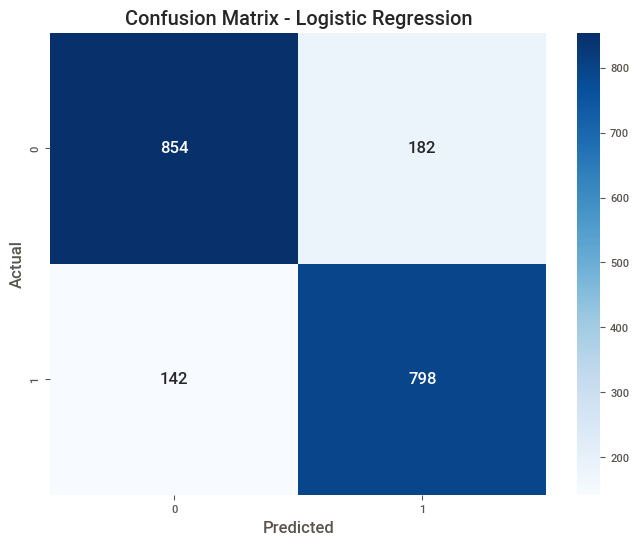

In [77]:
print("Classification Report")
print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

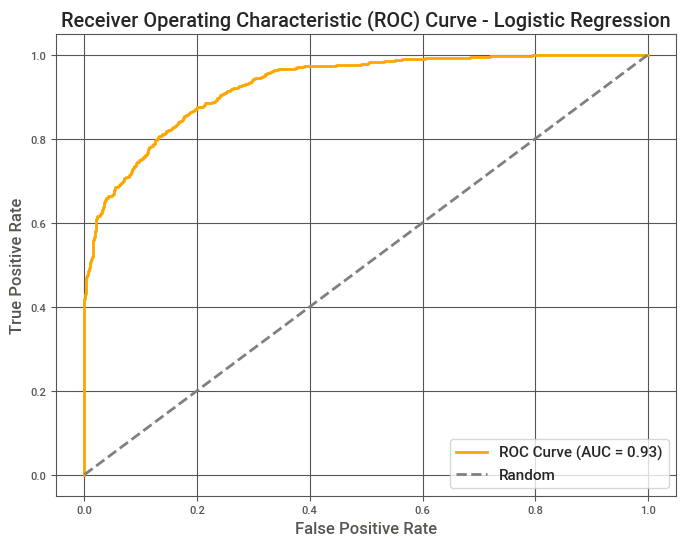

In [78]:

# Calculate ROC curve metrics
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Plot ROC Curve using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **Naive Bayes**

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions and calculate probabilities
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1036
           1       0.74      0.90      0.81       940

    accuracy                           0.80      1976
   macro avg       0.81      0.80      0.80      1976
weighted avg       0.81      0.80      0.80      1976



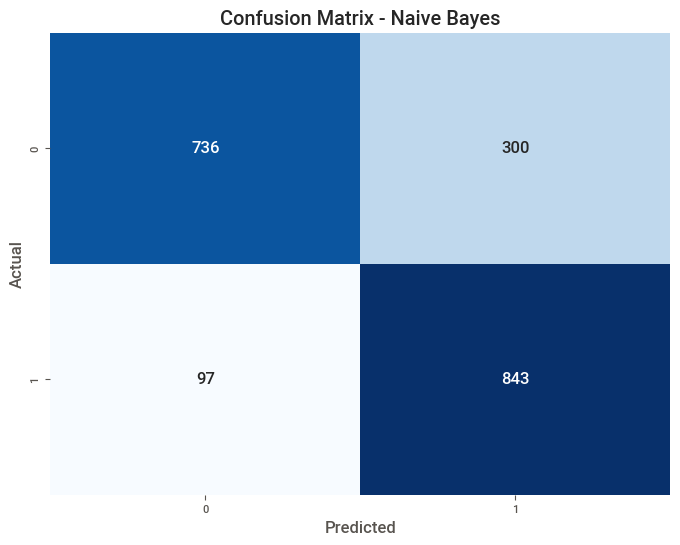

Naive Bayes MODEL
Accuracy: 0.7990890688259109
ROC-AUC: 0.879593156986774


In [81]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print model performance metrics
print("Naive Bayes MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_nb))

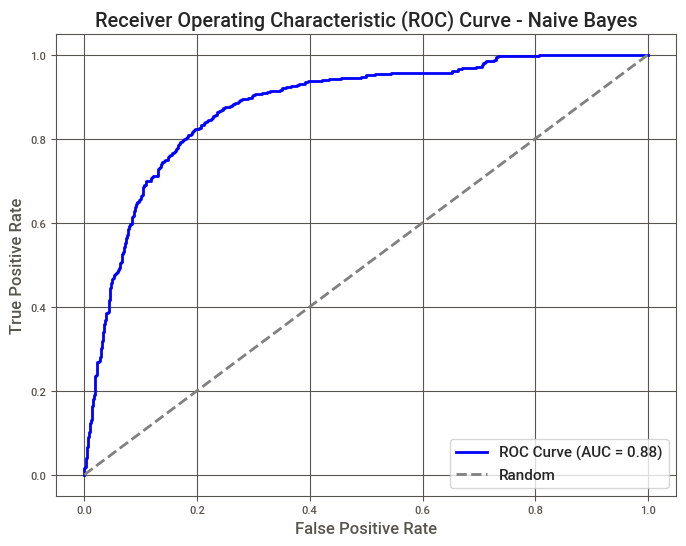

In [82]:
# Calculate ROC curve metrics
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC Curve using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Plotting Models and their Accuracies

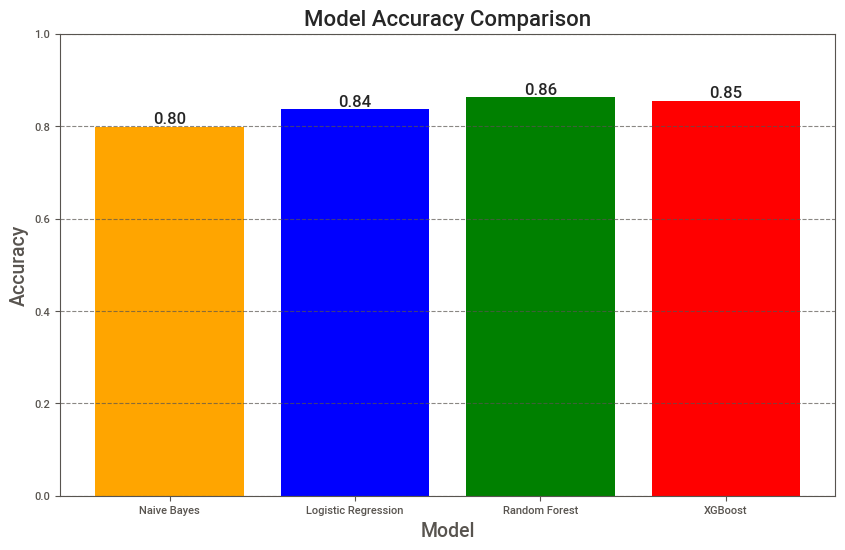

In [84]:
# Define the models and their accuracies
models = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_forest),
    accuracy_score(y_test, y_pred_xgb)
]

# Define colors for each model
colors = ['orange', 'blue', 'green', 'red']  # Corresponding colors

# Create a bar plot for model accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Set plot title and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


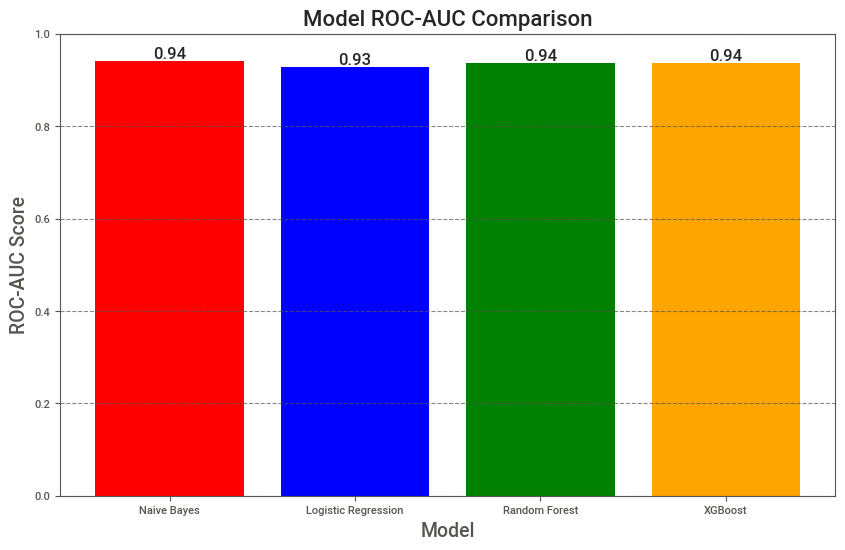

In [85]:
import matplotlib.pyplot as plt

# Define the models and their ROC-AUC scores
roc_auc_scores = [
    roc_auc_score(y_test, y_prob_xgb),
    roc_auc_score(y_test, y_prob_log),
    roc_auc_score(y_test, y_prob_forest),  # Assuming y_prob_tree is for Random Forest
    roc_auc_score(y_test, y_prob_forest)   # Correcting for potential confusion
]

# Define colors for each model (you can change these as per your preferences)
colors = ['red', 'blue', 'green', 'orange']  # Use colors that match ROC curve colors

# Create a bar plot for model ROC-AUC scores
plt.figure(figsize=(10, 6))
bars = plt.bar(models, roc_auc_scores, color=colors)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Set plot title and labels
plt.title('Model ROC-AUC Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('ROC-AUC Score', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Evaluating Random Forest on Full Dataset

Random Forest Model
Accuracy: 0.9605143262124127
ROC-AUC: 0.9603662623623687

classification_report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5174
           1       0.96      0.96      0.96      4703

    accuracy                           0.96      9877
   macro avg       0.96      0.96      0.96      9877
weighted avg       0.96      0.96      0.96      9877



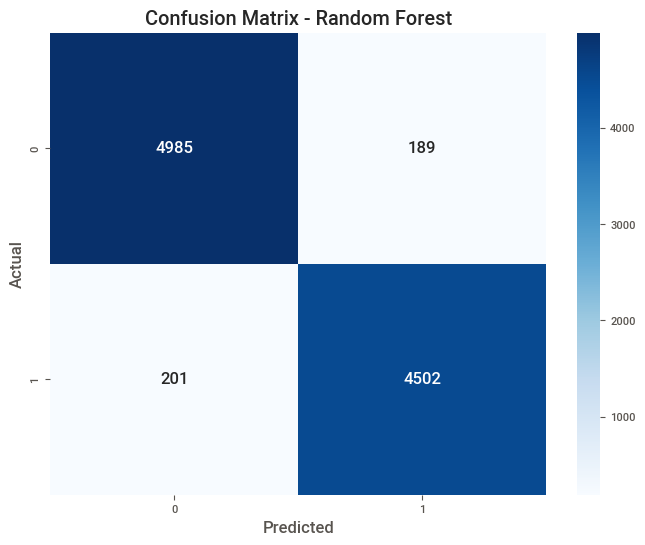

In [87]:
y_pred_forest = forest_model.predict(X)

print("Random Forest Model")
print("Accuracy:", accuracy_score(y, y_pred_forest))
print("ROC-AUC:", roc_auc_score(y, y_pred_forest))

print("\n""classification_report")
print(classification_report(y, y_pred_forest))
cm = confusion_matrix(y, y_pred_forest)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

From the Above models, we can say that the Random Forest Model performs much better than the other models. Customer churn economically decreases the company's funds and affects it's profitability.